Data Set extraída de [https://archive.ics.uci.edu/ml/datasets/Car+Evaluation](link)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('car.csv')
df.columns = ['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'decision'] #Defino los nombres de las columnas
df.head(3) #Muestro los primeros 3 registros

,price,maint,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc


In [5]:
decision = df['decision'].value_counts().sort_index(ascending=True) #Cantidad de valores dentro de 'decision' ordenados alfabéticamente
decision

acc       384
good       69
unacc    1209
vgood      65
Name: decision, dtype: int64

<AxesSubplot:>

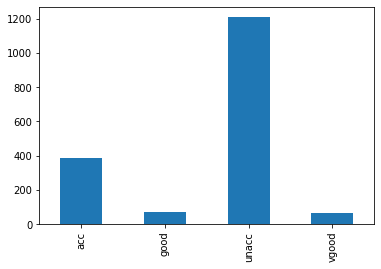

In [23]:
decision.plot(kind='bar')

In [6]:
df['price'].unique() #Array de los valores que se encuentran en 'price'

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [7]:
df['price'].replace(('vhigh', 'high', 'med', 'low'), (4,3,2,1), inplace=True) #A los valores los reemplazo por una serie de números

In [8]:
df.price.unique()

array([4, 3, 2, 1], dtype=int64)

In [9]:
price = df['price'].value_counts()

Text(0.5, 1.0, 'Precio por cantidad de autos')

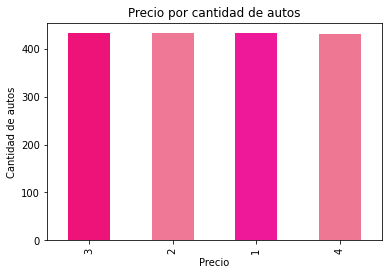

In [10]:
colors = ['#EE1379', '#EE7896', '#EE1998', '#EE7894']
price.plot(kind='bar', color=colors)
plt.xlabel('Precio')
plt.ylabel('Cantidad de autos')
plt.title('Precio por cantidad de autos')

# Modelo de Machine Learning - Tipo supervisado : Árbol de decisión

Para saber o no si conviene comprar un auto. Se deben reeemplazar los valores de tipo texto a tipo numérico

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1727 non-null   int64 
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   decision  1727 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.0+ KB


Sólo la columna de "price" es de formato numérico, por lo que el resto de columnas tenemos que pasarlas de formato.
Primero observo todos los valores que posee cada columna:

In [12]:
for e in df.columns:
    print(f'{e}: {df[e].unique()}')

price: [4 3 2 1]
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['med' 'high' 'low']
decision: ['unacc' 'acc' 'vgood' 'good']


In [13]:
df['maint'].replace(('low', 'med', 'high', 'vhigh'), (1,2,3,4), inplace=True)
df['doors'].replace(('2', '3', '4', '5more'), (1,2,3,4), inplace=True)
df['persons'].replace(('2', '4', 'more'), (1,2,3), inplace=True)
df['lug_boot'].replace(('small', 'med', 'big'), (1,2,3), inplace=True)
df['safety'].replace(('low', 'med', 'high'), (1,2,3), inplace=True)
df['decision'].replace(('unacc', 'acc', 'good', 'vgood'), (1,2,3,4), inplace=True)

Al trabajar con un algoritmo de aprendizaje, se tienen que dividir los datos, recomendado:
- 80% aprendizaje
- 20% prueba

In [14]:
dataset = df.values
X = dataset[:, 0:6] #Primeras 5 columnas
Y = np.asarray(dataset[:, 6], dtype='S6') #Última columna

Importación del árbol:

In [15]:
from sklearn import tree, metrics #Árbol, metricas para ver el nivel de aprendizaje
from sklearn.model_selection import train_test_split, cross_val_score #Para dividir los datos

Definición y división de los datos:

In [16]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0) #Se definen en ese órden

Definición del árbol:

In [17]:
tr = tree.DecisionTreeClassifier(max_depth=10)

Entrenamiento del árbol: Creación del primer modelo

In [18]:
tr.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=10)

Verificar el nivel de aprendizaje:

In [19]:
y_pred = tr.predict(X_Test)

Al conjunto del 20% de prueba le asignó etiquetas a la última columna:

In [20]:
y_pred

array([b'2', b'1', b'1', b'1', b'1', b'3', b'1', b'1', b'4', b'2', b'1',
       b'1', b'2', b'1', b'2', b'2', b'1', b'1', b'2', b'1', b'1', b'1',
       b'4', b'2', b'1', b'1', b'2', b'1', b'1', b'1', b'1', b'1', b'1',
       b'1', b'3', b'2', b'1', b'1', b'1', b'1', b'2', b'1', b'2', b'1',
       b'1', b'1', b'2', b'2', b'1', b'2', b'2', b'2', b'1', b'2', b'1',
       b'1', b'1', b'1', b'1', b'2', b'1', b'1', b'1', b'1', b'2', b'1',
       b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'3', b'2', b'1',
       b'2', b'1', b'1', b'2', b'2', b'2', b'1', b'2', b'2', b'1', b'4',
       b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'4', b'2', b'2', b'1',
       b'1', b'1', b'1', b'1', b'1', b'4', b'2', b'1', b'1', b'2', b'1',
       b'1', b'1', b'1', b'4', b'1', b'3', b'1', b'1', b'1', b'1', b'1',
       b'2', b'1', b'1', b'1', b'1', b'1', b'1', b'3', b'1', b'1', b'1',
       b'2', b'1', b'1', b'1', b'1', b'2', b'2', b'1', b'1', b'1', b'1',
       b'1', b'1', b'1', b'1', b'1', b'1', b'2', b'

Porcentaje de aprendizaje:

In [23]:
score = tr.score(X_Test, Y_Test)
print('Score: %0.3f' % (score*100))

Score: 96.821


El Score tiene que estar cercano a 100, en caso de dar 100, no sería correcto el modelo, hay una falla en los datos o faltante de los mismos